In [2]:
%load_ext autoreload
%autoreload 2

from utils import *
import numpy as np

In [4]:
a = np.arange(500**3).reshape(500,500,500)
a.shape

(500, 500, 500)

In [5]:
b = segment_image(a, [20,20,20])
b.shape

11 30 11 30


(19, 19, 19)

In [11]:
idx = 0
idx2 = 0
test_image = "./training/dataset0%d/image0%d.mhd" % (idx, idx)
test_points = "./training/dataset0%d/vessel%d/reference.txt" % (idx, idx2)

In [37]:
points = load_points(test_points)
num_points = points.shape[0]

random_idx = np.random.randint(0, num_points)
point = points[random_idx, :3]
radius = points[random_idx, 3]
print("radius: %.5f\n" % radius)

for i in range(50, 201):
    distance = calculate_distance(point, points[random_idx + i, :3])
    if distance > radius:
        print("forward: %.5f" % distance)
        forward_idx = random_idx + i
        break

for i in range(50, 201):
    distance = calculate_distance(point, points[random_idx - i, :3])
    if distance > radius:
        print("backward: %.5f" % distance)
        backward_idx = random_idx + i
        break

radius: 2.67924

forward: 2.69265
backward: 2.69976


In [23]:
selected_point, selected_radius

(array([87.1004, 85.0084, 23.99  ]), 1.67595)

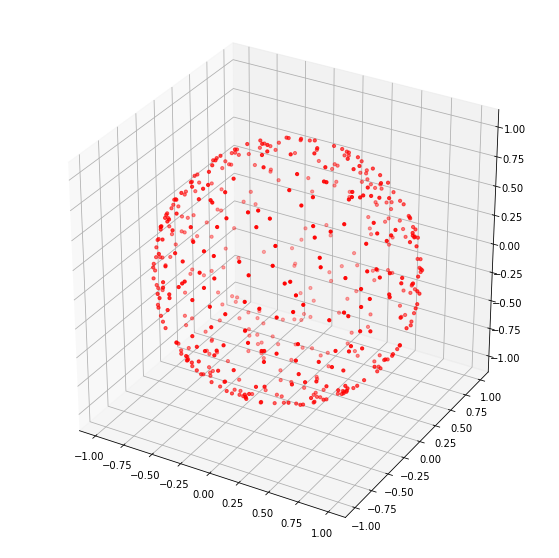

In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
%matplotlib inline

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(500)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'}, figsize=(10,10))
# ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=10, c='r', zorder=10)

In [32]:
point1 = np.array([0, 0, 0], dtype=float)
point2 = np.array([xi[0], yi[0], zi[0]])
point1 += [2.2, 1.38, 9.22]
point2 += [2.2, 1.38, 9.22]

In [13]:
def load_reference_points(fn="./preprocessing/reference_directions.txt"):
    """
    load the reference points previously generated and return them as a numpy array with shape (N, 3)
    """

    with open(fn, "r") as file:
        lines = file.readlines()

    coordinates = [[float(i) for i in line.strip().split(" ")] for line in lines]
    coordinates = np.array(coordinates)
    return coordinates

def calculate_distance(point1, point2):
    if (type(point1) != np.ndarray) or (type(point2) != np.ndarray):
        point1, point2 = np.array(point1), np.array(point2)
    distance = (point1 - point2) ** 2
    distance = np.sqrt(np.sum(distance))
    return distance

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [14]:
def find_direction_cat(point1, point2, reference_points):
    point2 -= point1
    point2 /= np.linalg.norm(point2)
    
    distances = []
    for r_point in reference_points:
        distances.append(angle_between(point2, r_point))
    distances = np.array(distances)
    
    return np.argmin(distances)

In [15]:
points = load_reference_points()

In [43]:
points[417], points[0]

(array([-0.279, -0.052, -0.959]), array([0.927, 0.359, 0.11 ]))

In [46]:
find_direction_cat(point1, point2, points)

417

In [49]:
(point2 - point1) / np.linalg.norm(point2 - point1)

array([-0.22967534, -0.1440635 , -0.96254607])

In [16]:
idx = 20
shift = np.random.randn(3)

point1 = np.array([0, 0, 0], dtype=float)
point2 = np.array(points[idx])
point1 += shift
point2 += shift

find_direction_cat(point1, point2, points)

20

NameError: name 'p2' is not defined

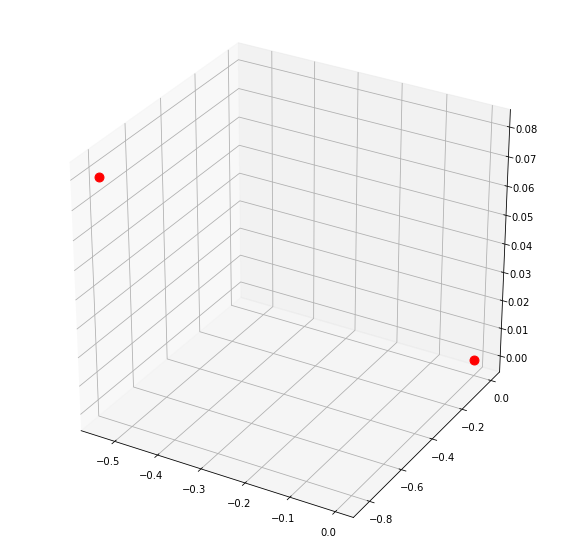

In [17]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.scatter(0, 0, 0, s=80, c="r")
ax.scatter(-0.54, -0.838, 0.08, s=80, c="r")
ax.scatter(p2[0], p2[1], p2[2], s=80, c="b")
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
plt.show()

In [62]:
p1 = np.array([68.6513, 57.758,  75.285 ])
p2 = np.array([68.3519, 57.2394, 75.323 ])
p2 -= p1
p2 /= np.linalg.norm(p2)
p2

array([-0.49897899, -0.86429694,  0.06333067])

In [ ]:
points = load_points(path)
reference_points = load_reference_points("./preprocessing/reference_directions.txt")

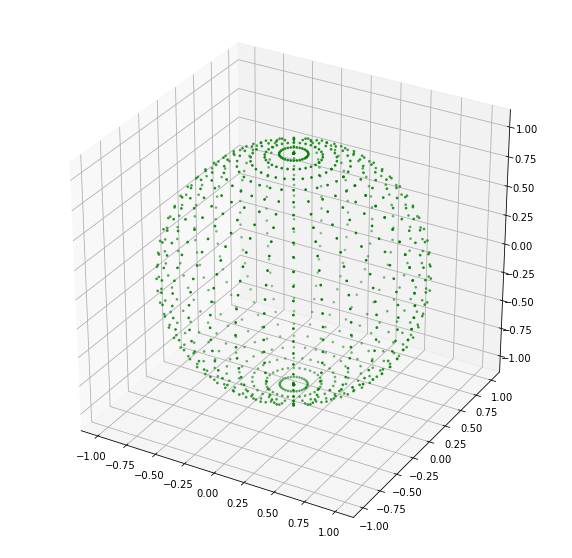

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_sphere_points(num_points=1000):
    # Generate several points distributed on the
    # sphere as a reference direction, not evenly!
    sqrt_num = int(np.sqrt(num_points))
    u, v = np.mgrid[0:2 * np.pi:sqrt_num * 1j, 0:np.pi:sqrt_num * 1j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z, color="g", s=3)
    plt.show()
    
get_sphere_points()

In [11]:
import math

def fibonacci_sphere(samples=100, randomize=False):
    # Generate several points evenly distributed on the
    # sphere as a reference direction
    rnd = 1.
    if randomize:
        rnd = random.random() * samples

    points = []
    offset = 2. / samples
    increment = math.pi * (3. - math.sqrt(5.))

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2)
        r = math.sqrt(1 - pow(y, 2))

        phi = ((i + rnd) % samples) * increment

        x = math.cos(phi) * r
        z = math.sin(phi) * r

        points.append([x, y, z])

    return np.array(points)

points = fibonacci_sphere(500)

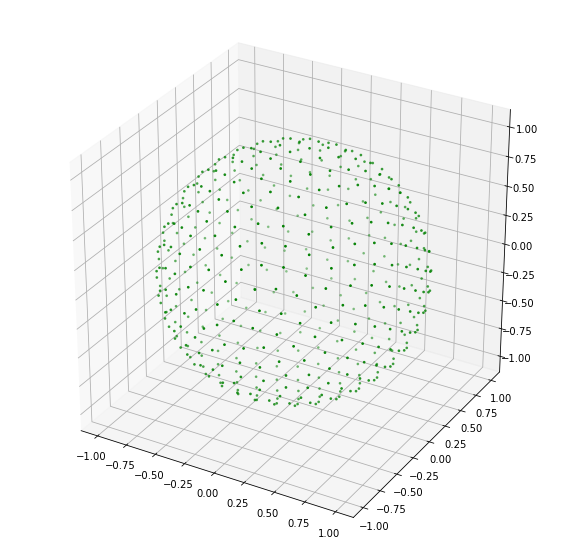

In [12]:
x, y, z = points.transpose(1, 0)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, color="g", s=3)
plt.show()

In [8]:
points.shape

(100, 3)